## imports

In [569]:
import numpy as np
import matplotlib.pyplot as plt
import lifetimes
%matplotlib widget

## Hazard function 

In [570]:
#Baseline 
def h0_Weibull(t, theta):
    (alpha, beta) = theta 
    h0 = beta / alpha * (t / alpha) ** (beta - 1)
    return h0

def H0_Weibull(t, theta):
    alpha, beta = theta 
    H0 = (t / alpha) ** beta
    return H0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
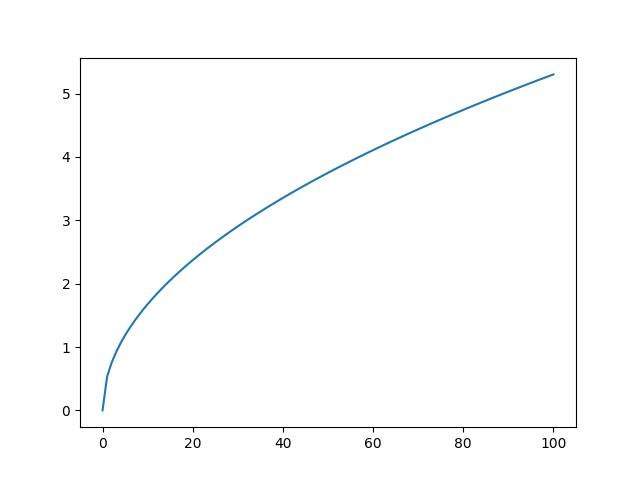

In [571]:
T = np.linspace(0, 100, 100)
theta = (2, 1.5)
y = [h0_Weibull(t, theta) for t in T]
plt.figure()
plt.plot(T,y)
plt.show()

In [572]:
def psi(x):
    return x**2 + x

In [573]:
# Hazard rate function with covariate 
# Weibull
def h_Weibull(t,theta,x):
    h_Weibull = h0_Weibull(t,theta)*np.exp(psi(x))
    return h_Weibull

def H_Weibull(t,theta,x):
    H_Weibull = H0_Weibull(t,theta)*np.exp(psi(x))
    return H_Weibull 

def survival_func_Weibull(t,theta,x):
    return np.exp(-H_Weibull(t,theta,x))

In [574]:
theta = (2, 1.5)

## Affichage d'exemples 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
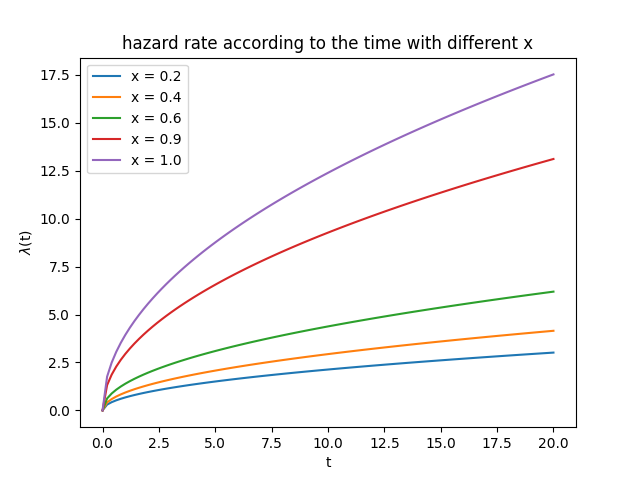

In [575]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [h_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('$\lambda$(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
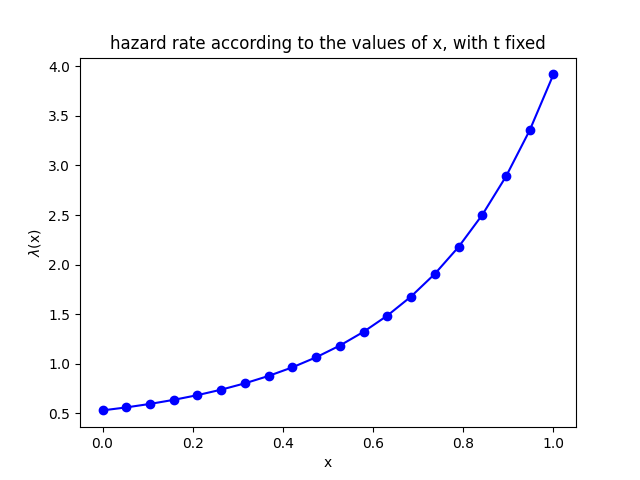

In [576]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [h_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('$\lambda$(x)')
plt.title('hazard rate according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
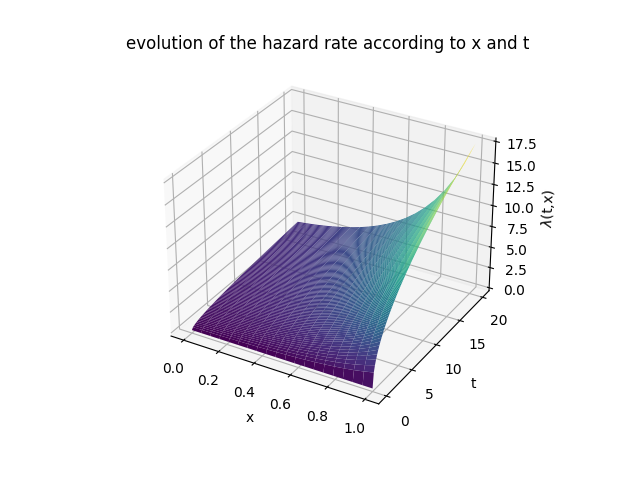

In [577]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
h_val = h_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, h_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the hazard rate according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$\lambda$(t,x)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
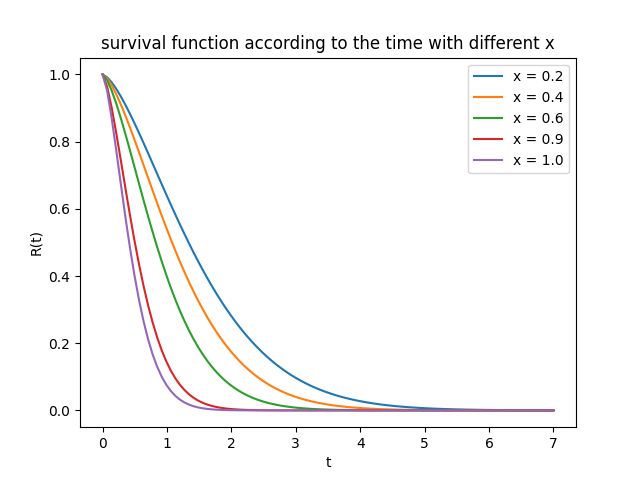

In [578]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 7, 100)
plt.figure()
for x in X : 
    y = [survival_func_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('survival function according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
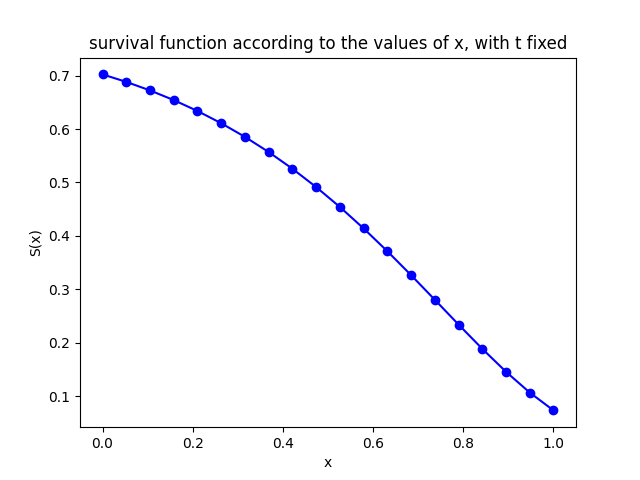

In [579]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [survival_func_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('survival function according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
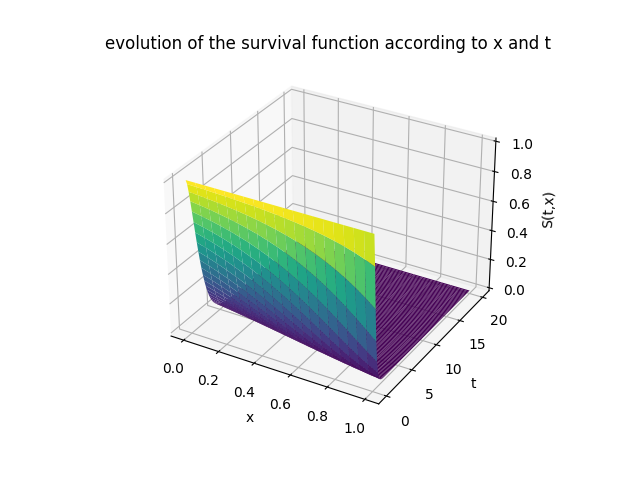

In [580]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
S_val = survival_func_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, S_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the survival function according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('S(t,x)')
plt.show()

## Data generation 

In [581]:
# outputs :
# T : death times
# X : value of the covariable for each individual
# delta[i] : censure or not of i-th individual
def power_of_list(liste: list, power: float):
    l = []
    for i in liste:
        l.append(i ** power)
    return l


def invg(x, psi, theta=theta, n=100):
    alpha = theta[0]
    beta = theta[1]
    R = np.random.uniform(0, 1, n)
    l = (alpha * (-np.log(R) * np.exp(-psi(x))))
    liste = power_of_list(
        liste=l, power=(1 / beta)
    )
    return liste


def generate_data(x, n=100, theta=theta, psi=psi):
    alpha = theta[0]
    beta = theta[1]
    T = invg(x, psi, theta=theta,n=n)
    X = x * np.ones(len(T))
    delta = [True for t in range(len(T))]
    return np.array(T), X, delta

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
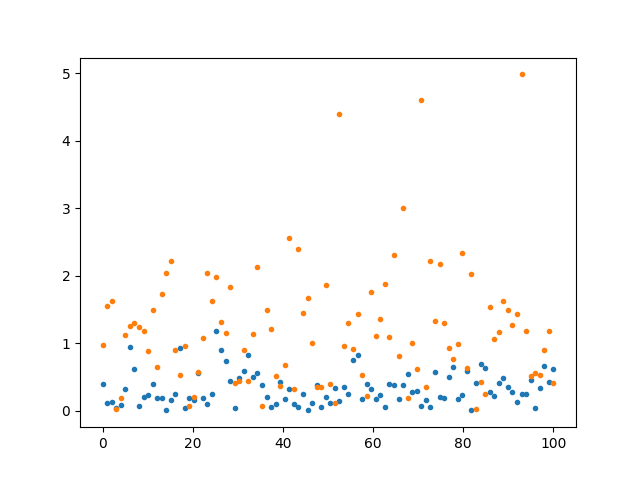

In [582]:
x1 = 1
T1, X1, delta1 = generate_data(x1, n=100)

x2 = 0.3
T2, X2, delta2 = generate_data(x2, n=100)

plt.figure()
plt.plot(np.linspace(0,100,100),T1,'.')
plt.plot(np.linspace(0,100,100),T2,'.')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
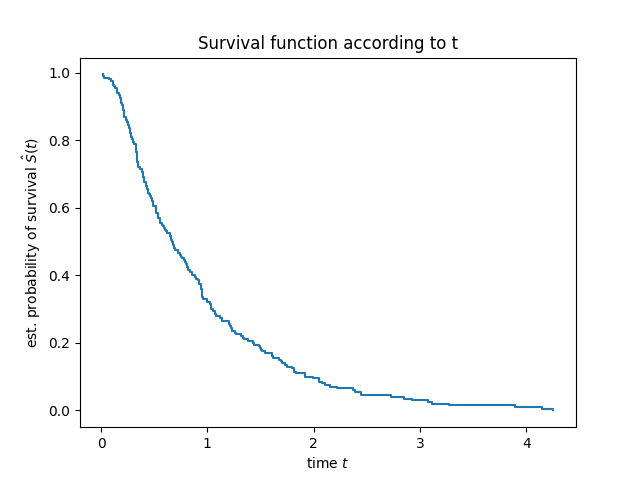

In [583]:
T = []
X = []
delta = []
x_values = np.random.uniform(0, 1, 200)
for i in range(200):
    Ti, Xi, deltai = generate_data(x_values[i], n=1)
    T.append(Ti[0])
    X.append(Xi[0])
    delta.append(deltai[0])
time1, survival_prob1 = kaplan_meier_estimator(delta, T)
plt.figure()
plt.step(time1, survival_prob1, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('Survival function according to t')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
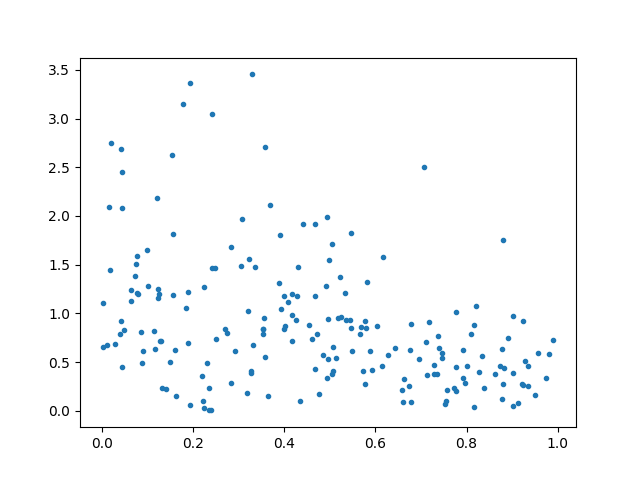

In [542]:
plt.figure()
plt.plot(X, T, '.')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
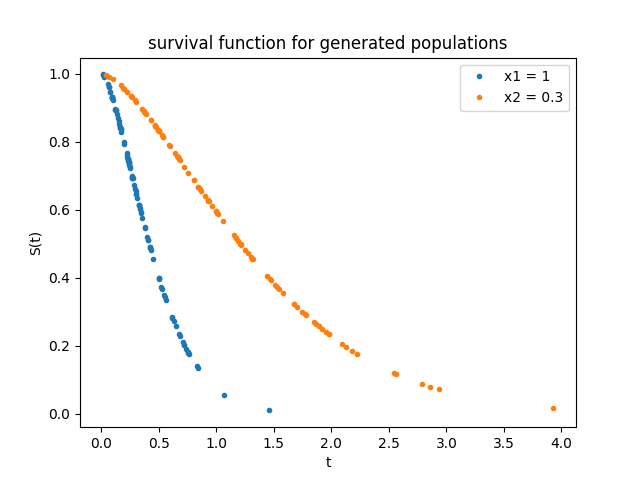

In [543]:
# T_source = np.linspace(0, 1.2, 100)
plt.figure()
y = [survival_func_Weibull(t,theta,x1) for t in T1]
plt.plot(T1, y, '.', label = 'x1 = '+str(x1))

y = [survival_func_Weibull(t,theta,x2) for t in T2]
plt.plot(T2, y, '.', label = 'x2 = '+str(x2))
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('survival function for generated populations')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
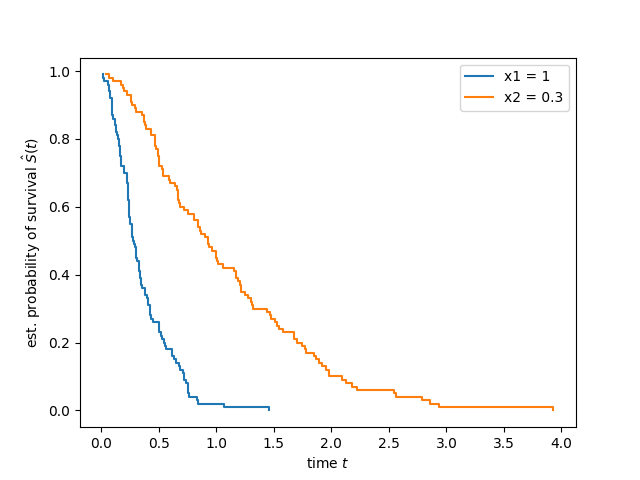

In [544]:
from sksurv.nonparametric import kaplan_meier_estimator

time1, survival_prob1 = kaplan_meier_estimator(delta1, T1)
time2, survival_prob2 = kaplan_meier_estimator(delta2, T2)
plt.figure()
plt.step(time1, survival_prob1, where="post", label = 'x1 = '+str(x1))
plt.step(time2, survival_prob2, where="post", label = 'x2 = '+str(x2))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend()
plt.show()

In [545]:
# Concatenating and sorting both populations 
T_2obs = np.concatenate((T1, T2))
X_2obs = np.concatenate((X1, X2))
delta_2obs = np.concatenate((delta1, delta2))
 
indexes = np.argsort(T)
T_2obs = T_2obs[indexes]
X_2obs = X_2obs[indexes]
delta_2obs = delta_2obs[indexes]

## Approximation of $\Psi$ as a linear function : partial likelihood

In [546]:
#Trier X, T, et delta en fonction de T 
def d_partial_likelihood(mu, T, X, delta):
    #T, X, delta = population
    dl = 0
    exp_x = np.exp([mu*Xi for Xi in X])
    X_exp_x = np.array([Xi * exp_xi for Xi, exp_xi in zip(X, exp_x)])
    for indiv in range(len(T)):
        dl += delta[indiv]*(X[indiv] - np.sum(X_exp_x[indiv:])/np.sum(exp_x[indiv:]))
    return -dl

In [547]:
# Resolution
from scipy.optimize import fsolve
mu_opt = fsolve(d_partial_likelihood, 1 ,args = (T, X, delta))
print(mu_opt)

[-0.13703809]


In [548]:
from lifelines import CoxPHFitter
import pandas as pd

data = pd.DataFrame(np.array([T, X, delta]).T, columns = ['T', 'X', 'delta'])
cph = CoxPHFitter()
cph.fit(data, 'T', 'delta')
cph.summary
mu_opt_cox = float(cph.params_)
mu_opt_cox

1.7533657396836362

## Results of this approach  

In [549]:
def survival_Weibull_linear(t, theta, x, mu):
    return np.exp(-H0_Weibull(t,theta)*np.exp(mu*x))

In [550]:
def psi_linear(x, mu=mu_opt_cox):
    return mu*x
x1 = 1

T_linear = []
X_linear = []
delta_linear = []
for i in range(200):
    Ti, Xi, deltai = generate_data(x_values[i], n=1, psi = psi_linear)
    T_linear.append(Ti[0])
    X_linear.append(Xi[0])
    delta_linear.append(deltai[0])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
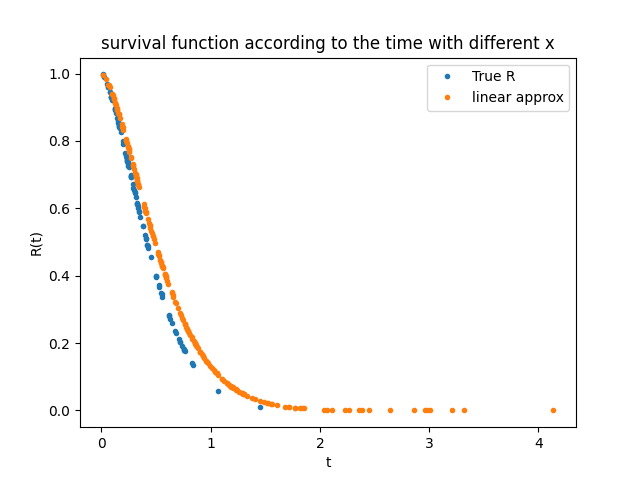

In [551]:
plt.figure()
y = [survival_func_Weibull(t,theta,x1) for t in T1]
plt.plot(T1, y, '.', label = 'True R')

y = [survival_Weibull_linear(t,theta,x1,mu_opt_cox) for t in T_linear]
plt.plot(T_linear, y, '.', label = 'linear approx')

plt.legend()
plt.xlabel('t')
plt.ylabel('R(t)')
plt.title('survival function according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
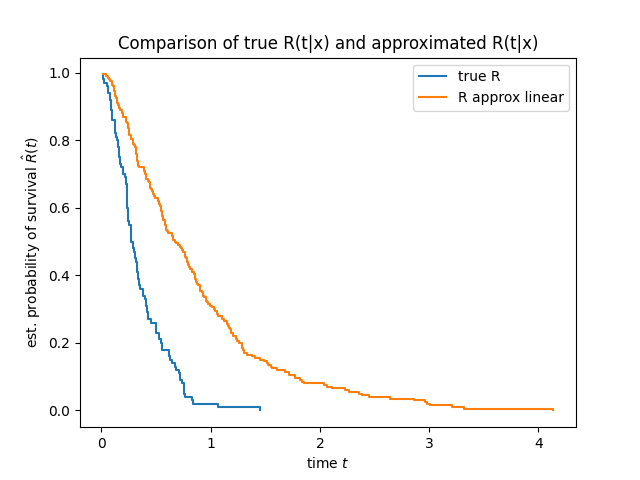

In [552]:
time1, survival_prob1 = kaplan_meier_estimator(delta1, T1)
time2, survival_prob2 = kaplan_meier_estimator(delta_linear, T_linear)
plt.figure()
plt.title('Comparison of true R(t|x) and approximated R(t|x)')
plt.step(time1, survival_prob1, where="post", label = 'true R')
plt.step(time2, survival_prob2, where="post", label = 'R approx linear')
plt.ylabel("est. probability of survival $\hat{R}(t)$")
plt.xlabel("time $t$")
plt.legend()
plt.show()

## Local likelihood approach 

In [553]:
def K_gauss(u):
    return 1/np.sqrt(2*np.pi)*np.exp(-1/2*u**2)
    
def Kh(t, h=2):
    return 1/h*K_gauss(t/h)

In [554]:
# p = 2
x = X[0]
X_tilde = np.array([[1, Xi-x, (Xi-x)**2] for Xi in X])
#X_tilde = np.array([[1, Xi-x] for Xi in X])

## derivation of the log likelihood according to gamma and theta

In [555]:
def dl_gamma(gamma, params):
    X_tilde, T, delta, theta = params
    n = len(T)
    dl = 0 
    for i in range(n):
        dl += (delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i].T@gamma))*X_tilde[i].T*Kh(X_tilde[i][1])
        print(gamma)
    dl *= 1/n
    return dl 


def eps0_prime(t, theta):
    alpha, beta = theta
    if alpha <= 0:
        alpha = 1e-6
    #derived according to alpha
    #d_alpha_num = 1/beta*(t/alpha)**(beta-1) + alpha/beta*(beta-1)*(-t/alpha**2)*(t/alpha)**(beta-2)
    #d_alpha_denomin = alpha/beta*(t/alpha)**(beta-1)
    #d_alpha = d_alpha_num/d_alpha_denomin
    d_alpha = -beta/alpha
    #derived according to beta 
    #d_beta_num = -alpha/beta**2*(t/alpha)**(beta-1) + alpha/beta * np.log(t/alpha) * (t/alpha)**(beta-1)
    #d_beta_denomin = alpha/beta*(t/alpha)**(beta-1)
    #d_beta = d_beta_num/d_beta_denomin
    d_beta = 1/beta + np.log(t/alpha)
    return np.array([d_alpha, d_beta])


def H0_prime(t, theta):
    alpha, beta = theta
    if alpha <= 0:
        alpha = 1e-6
    d_alpha = -beta/alpha * H0_Weibull(t, theta)
    d_beta = np.log(t/alpha)*H0_Weibull(t, theta)
    return np.array([d_alpha, d_beta])


def dl_theta(theta, params):
    X_tilde, T, delta, gamma = params
    n = len(T)
    dl = 0 
    for i in range(n):
        dl += (delta[i]*eps0_prime(T[i], theta) - H0_prime(T[i], theta)*np.exp(X_tilde[i].T@gamma))*Kh(X_tilde[i][1])
    dl *= 1/n
    return dl 

In [556]:
params_gamma = [X_tilde, T, delta, [1, 1]]
gamma_opt = fsolve(dl_gamma, [mu_opt_cox*x, mu_opt_cox, mu_opt_cox] ,args = params_gamma)

[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.75336574 1.75336574]
[1.27759553 1.753365

[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.67395712 1.25515618]
[0.54167976 1.673957

[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.62135256 0.93515544]
[0.45372309 1.621352

In [557]:
def l_gamma(gamma, params) : 
    X_tilde, T, delta, theta = params
    n=len(T)
    l = 0 
    for i in range(n):
        l += Kh(X_tilde[i][1])*((np.log(h0_Weibull(T[i], theta)) + X_tilde[i][0]*gamma[0]+X_tilde[i][1]*gamma[1]+X_tilde[i][2]*gamma[2])*delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i][0]*gamma[0]+X_tilde[i][1]*gamma[1]+X_tilde[i][2]*gamma[2]))
    l *= 1/n
    return -l 

In [558]:
def l_theta(theta, params) : 
    X_tilde, T, delta, gamma = params
    n=len(T)
    l = 0 
    for i in range(n):
        l += Kh(X_tilde[i][1])*((np.log(h0_Weibull(T[i], theta)) + X_tilde[i][0]*gamma[0]+X_tilde[i][1]*gamma[1]+X_tilde[i][2]*gamma[2])*delta[i] - H0_Weibull(T[i], theta)*np.exp(X_tilde[i][0]*gamma[0]+X_tilde[i][1]*gamma[1]+X_tilde[i][2]*gamma[2]))
    l *= 1/n
    return -l 

In [559]:
from scipy.optimize import minimize
params_gamma = [X_tilde, T, delta, [2, 1.5]]
gamma_opt = minimize(l_gamma, [2,2,1] ,args = params_gamma)
print(gamma_opt)

      fun: 0.14163138185776855
 hess_inv: array([[  8.74787363,   8.09342056, -14.22487042],
       [  8.09342056, 241.32635096, 381.28585227],
       [-14.22487042, 381.28585227, 799.11740647]])
      jac: array([-7.50087202e-06,  2.49966979e-06, -2.16066837e-07])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 23
     njev: 25
   status: 0
  success: True
        x: array([1.56920079, 2.42461476, 1.40385139])


In [560]:
params_theta = [X_tilde, T, delta, [x**2+x, 2*x+1, 1]]
theta_opt = minimize(l_theta, [2,1.5] ,args = params_theta)
print(theta_opt)

      fun: 0.14208577132873937
 hess_inv: array([[ 5.76878329, -1.52673672],
       [-1.52673672,  6.07611144]])
      jac: array([-1.67638063e-07, -3.53902578e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([1.55280784, 1.51806336])


In [565]:
eps = 1e-2 
gamma_prec = [mu_opt_cox*x, mu_opt_cox, mu_opt_cox]
theta_prec = [1, 1]

params_theta = [X_tilde, T, delta, gamma_prec]
theta_opt = minimize(l_theta, theta_prec ,args = params_theta)
theta_opt = theta_opt.x
print(theta_opt)


params_gamma = [X_tilde, T, delta, theta_opt]
gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
gamma_opt = gamma_opt.x
print(gamma_opt)

ite_max = 20
ite=0
while (np.linalg.norm(theta_opt - theta_prec) > eps or np.linalg.norm(gamma_opt - gamma_prec) > eps) and ite < ite_max:
    theta_prec = theta_opt
    gamma_prec = gamma_opt 
    
    params_theta = [X_tilde, T, delta, gamma_prec]
    theta_opt = minimize(l_theta, [1,1] ,args = params_theta)
    theta_opt = theta_opt.x
    print(theta_opt)
    
    params_gamma = [X_tilde, T, delta, theta_opt]
    gamma_opt = minimize(l_gamma, gamma_prec ,args = params_gamma)
    gamma_opt = gamma_opt.x
    print(gamma_opt)
    ite +=1

[2.00093737 1.41448952]
[1.50361704 2.28831244 1.32295248]
[1.95365191 1.48614562]
[1.52381123 2.40255192 1.39070367]
[1.94829509 1.49499765]
[1.52643623 2.41068392 1.38741268]
[1.94770853 1.49599691]
[1.52653819 2.41789913 1.3998145 ]
[1.94763778 1.4961991 ]
[1.52653819 2.41789913 1.3998145 ]


## Results of this approach 

[1.52653819 2.41789913 1.3998145 ]
[1.94763778 1.4961991 ]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
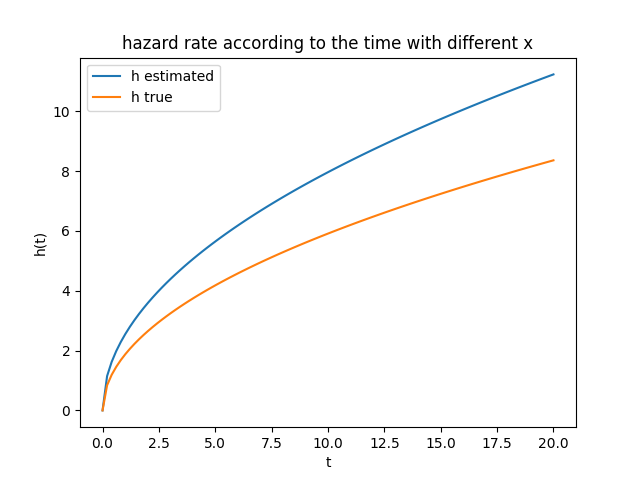

In [568]:
T = np.linspace(0, 20, 100)
print(gamma_opt)
print(theta_opt)
plt.figure()
y_hat = [h0_Weibull(t,theta_opt)*np.exp(gamma_opt[0]) for t in T]
y_true = [h_Weibull(t,theta,x) for t in T]
plt.plot(T, y_hat, label = 'h estimated')
plt.plot(T, y_true, label = 'h true')
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()